In this lab, we’ll be using a dataset from Kaggle — always a rich source for real-world problems! Specifically, we'll work with an **Income** dataset to predict whether an individual makes **over $50,000 per year** based on various features.

**[Dataset Link: Income Classification Dataset](https://www.kaggle.com/datasets/lodetomasi1995/income-classification?sort=published)**

---

## Lab Goals
- **Primary Objective:** Predict whether an individual earns more than $50,000 per year.
- **Secondary Objectives:** 
  - Explore model performance across different techniques.
  - Understand how different data types impact modeling, especially with neural networks.

## Assignment Specifications

- **Required Models:**
  - Implement a **Naive Bayes** model.
  - Implement a **Neural Network** model.

- **Additional Models:**
  - Explore at least **two additional models** (e.g. Decision Trees, Random Forest, etc.).
  - *Tip:* You can use multiple neural network variations if you like, but we encourage you to revisit some of the classical models we’ve discussed previously.

- **Data Preprocessing:**
  - The dataset includes variables of multiple types (numerical, categorical, etc.).
  - You **may need to one-hot encode** the categorical (character) variables, especially for models like Neural Networks.

- **Narration & Documentation:**
  - Write your notebook for a **non-expert audience**:
    - Explain your steps clearly.
    - Avoid technical jargon where possible.
    - Include all your code, but focus on **narrating** your choices, findings, and interpretations in plain language.

- **Submission Instructions:**
  - Submit your work as one of the following:
    - An **HTML** file
    - An **IPYNB (Jupyter Notebook)** file
    - A **Google Colab link**
  - **Important:** Before submitting, rerun your entire notebook from top to bottom to ensure it runs cleanly!
___

## Dataset Preview

In [213]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

In [214]:
df = pd.read_csv('Data/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dataset Information

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [216]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [217]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [218]:
def remove_spaces_from_columns(df):
    df.columns = df.columns.str.replace(' ', '', regex=False)
    return df
df = remove_spaces_from_columns(df)

In [219]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Class Distribution of Our Target
Do we have a majority class? 

In [220]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Exploratory Plots

Below are visuals exploring variables we can typically associate with income levels. 

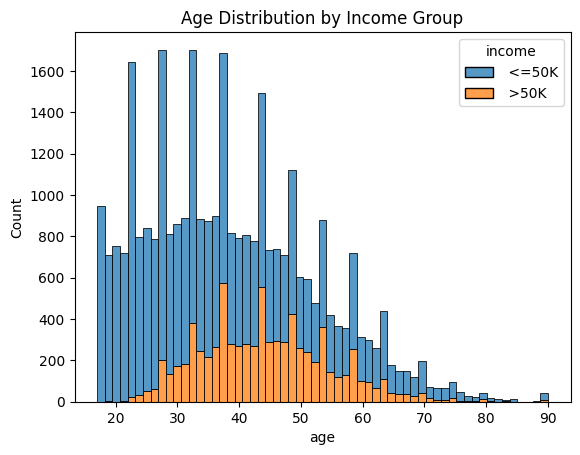

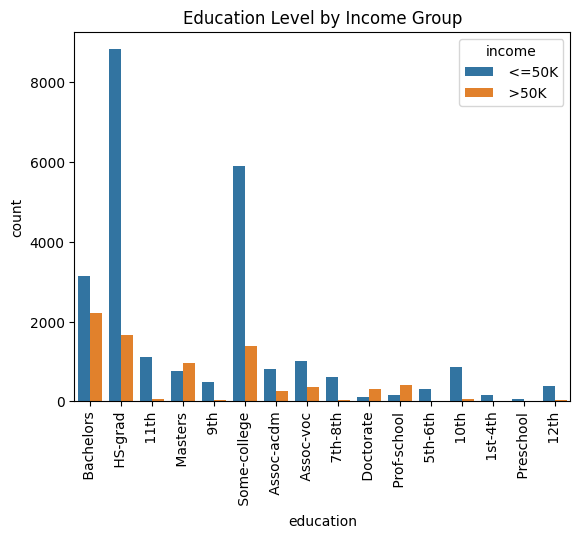

In [221]:
# Age distribution
sns.histplot(data=df, x="age", hue='income', multiple="stack")
plt.title('Age Distribution by Income Group')
plt.show()

# Categorical feature counts
sns.countplot(data=df, x="education", hue="income")
plt.xticks(rotation=90)
plt.title('Education Level by Income Group')
plt.show()

#### Age Distribution by Income Group

This plot shows the distribution of ages for individuals grouped by their income level (earning more or less than $50K per year).

- Most individuals earning less than \$50K tend to be younger, between their 20s and early 40s.
- Higher income (> \$50K) becomes more common among individuals aged roughly **30–55**.
- After about age 60, both groups decline significantly, likely due to retirement.
- Overall, income tends to increase with age up to a certain point, but the number of high earners still remains lower compared to those earning under $50K.

This suggests that age may be a useful predictor for income, but not the only factor; many older individuals still earn under $50K.

#### Education Level by Income Group

This plot shows how different education levels are associated with income levels.

- Individuals with only a high school diploma (HS-grad) or some college education are far more likely to earn less than \$50K.
- Higher education levels such as **Bachelors**, **Masters**, and **Doctorates** are associated with a greater proportion of higher income (> \$50K).
- However, even at the Bachelors level, many individuals still earn less than $50K, indicating that education alone doesn't guarantee a high salary.
- Very low education levels (e.g., 5th-6th grade, 10th grade) are strongly associated with lower income.

This suggests that higher education increases the likelihood of earning more, but it’s not the only factor; experience, job sector, and other variables may also play important roles, which is to be explored in modeling. 



## Feature Selection and Preprocessing

In this section, we prepare our features (`X`) and target (`y`), identify categorical and numerical variables, and create a preprocessing pipeline to handle them appropriately.

Since the dataset includes both numerical and categorical data, we use a `ColumnTransformer` to:

- **One-hot encode** the categorical features,
- **Standard scale** the numerical features.

In [222]:
# Define X and y
X = df.drop("income", axis=1)
y = df["income"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


### Preprocessing Pipeline

We can now set up a `ColumnTransformer`!

- Categorical variables will be **one-hot encoded**.
- Numerical variables will be **standard scaled**.

In [223]:
# Build preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for balanced target
)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (26048, 14)
Test data shape: (6513, 14)


## Preliminary Modeling

### Bagging Classifier

Bagging (Bootstrap Aggregating) is an ensemble technique that trains multiple base models on different random subsets of the data and aggregates their predictions. In this case, we use a Decision Tree as the base estimator inside a Bagging Classifier. Bagging helps reduce model variance and can improve accuracy, especially for unstable models like trees.

We use GridSearchCV with Stratified 5-fold cross-validation to tune hyperparameters such as the number of trees, maximum depth of each tree, and sample/feature proportions.

Below, we show the best parameters found and the model’s performance on the test set.


In [224]:
# Set up Bagging pipeline
bagging_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", BaggingClassifier(
        estimator=DecisionTreeClassifier(class_weight="balanced", random_state=42),
        random_state=42
    ))
])

# Bagging hyperparameter grid
bagging_param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__estimator__max_depth": [None, 5, 10],
    "model__max_samples": [0.5, 1.0],
    "model__max_features": [0.5, 1.0]
}

# Stratified 5-fold cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with Stratified CV
bagging_grid = GridSearchCV(
    bagging_pipeline,
    param_grid=bagging_param_grid,
    cv=stratified_cv,
    scoring="accuracy",
    n_jobs=-1
)

# Fit the grid search
bagging_grid.fit(X_train, y_train)

# Evaluate
print("Best Bagging Parameters:", bagging_grid.best_params_)
print("Best Bagging Accuracy (CV):", bagging_grid.best_score_)

# Test set evaluation
y_pred_bagging = bagging_grid.predict(X_test)
print("\nBagging Test Set Performance:")
print(classification_report(y_test, y_pred_bagging))

Best Bagging Parameters: {'model__estimator__max_depth': None, 'model__max_features': 0.5, 'model__max_samples': 0.5, 'model__n_estimators': 100}
Best Bagging Accuracy (CV): 0.8595670125049331

Bagging Test Set Performance:
              precision    recall  f1-score   support

       <=50K       0.90      0.92      0.91      4945
        >50K       0.73      0.66      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



#### Results

- The best hyperparameters selected were 100 estimators, using 50% of samples and 50% of features per tree, with no maximum depth limit.
- The cross-validated accuracy was approximately **86%**, suggesting good generalization performance.
- On the test set:
  - The overall accuracy was also **86%**, closely matching the CV results.
  - The model performed better on the majority class (`<=50K`) with high precision and recall.
  - For the minority class (`>50K`), the recall was lower (**66%**), meaning it missed some high earners.
  
This is expected due to the class imbalance in the dataset, though the use of `class_weight="balanced"` helped improve minority class recall compared to a naive model.

### Random Forest Classifier

Random Forest is a specialized ensemble method that builds multiple decision trees using both random subsets of the data and random subsets of features at each split. This reduces correlation between the trees and often improves overall performance compared to standard bagging.

Again, we use GridSearchCV with Stratified 5-fold cross-validation to find the best hyperparameters for the number of trees, maximum depth, and number of features considered at each split.

Below, we show the best parameters found and the model’s test set results.


In [225]:
# Set up Random Forest pipeline
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Random Forest hyperparameter grid
rf_param_grid = {
    "model__n_estimators": [100, 200],  # number of trees
    "model__max_depth": [None, 10, 20],  # max depth of trees
    "model__max_features": ["sqrt", "log2"]  # feature subset strategy
}

# Stratified 5-fold CV
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with Stratified CV
rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=stratified_cv,
    scoring="accuracy",
    n_jobs=-1
)

# Fit the grid search
rf_grid.fit(X_train, y_train)

# Best parameters and score
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Accuracy (CV):", rf_grid.best_score_)

# Test set evaluation
y_pred_rf = rf_grid.predict(X_test)
print("\nRandom Forest Test Set Performance:")
print(classification_report(y_test, y_pred_rf))

Best Random Forest Parameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 100}
Best Random Forest Accuracy (CV): 0.8529255175874916

Random Forest Test Set Performance:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4945
        >50K       0.75      0.63      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513



#### Results

- The best hyperparameters selected were 100 estimators, no maximum depth limit, and square root (`sqrt`) of features considered at each split.
- The cross-validated accuracy was approximately **85%**, slightly lower than the Bagging model but still strong.
- On the test set:
  - The overall accuracy again was about **86%**, very similar to Bagging.
  - The Random Forest showed slightly higher precision for the minority class (`>50K`) but slightly lower recall (**63%** compared to Bagging’s 66%).

Overall, both ensemble methods performed similarly, but Bagging achieved slightly better recall on the minority class. This suggests Bagging might be slightly better suited for this task when classifying high-income individuals is a priority.


#### Feature Importance (Random Forest)

One of the advantages of ensemble tree models like Random Forest is the ability to extract feature importance scores. These scores show which features contributed the most to the model's decision-making.

Below, we examine the top features based on importance scores.


In [226]:
# Get the best Random Forest model
best_rf = rf_grid.best_estimator_

# Get feature names after preprocessing
# This is a little tricky because one-hot encoding creates new feature names
# But we can handle it like this:
ohe = best_rf.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)

# Combine numerical and categorical feature names
feature_names = np.concatenate([encoded_cat_features, numerical_cols])

# Now get importances
importances = best_rf.named_steps['model'].feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top 10 important features
feature_importance_df.head(10)

,feature,importance
102,age,0.149891
103,fnlwgt,0.136225
27,marital-status_ Married-civ-spouse,0.079945
107,hours-per-week,0.078666
105,capital-gain,0.064468
104,education-num,0.064231
47,relationship_ Husband,0.058262
29,marital-status_ Never-married,0.035215
106,capital-loss,0.021410
50,relationship_ Own-child,0.017920


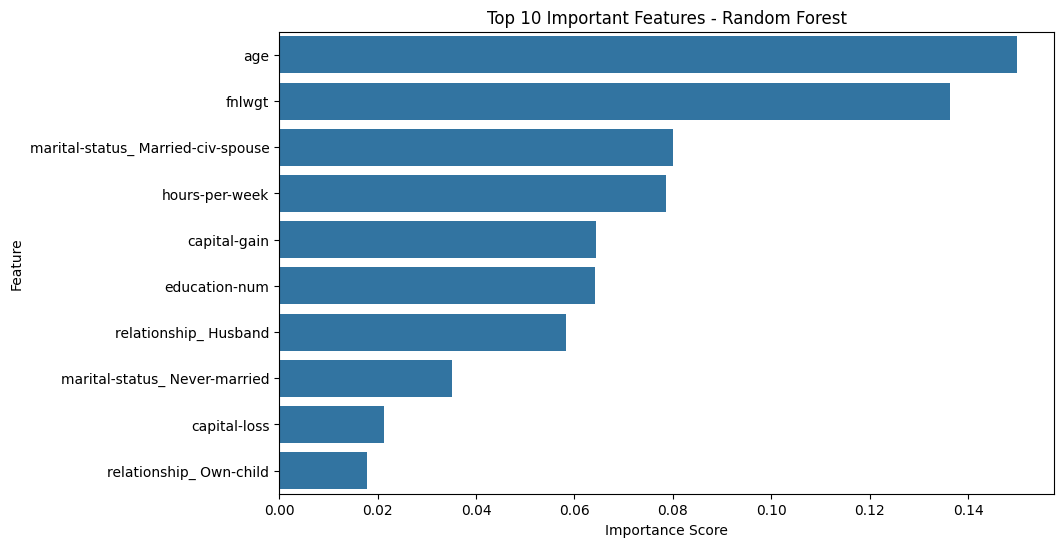

In [227]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(10), x="importance", y="feature")
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Key Observations:

- **Age** was the most important feature for predicting income, suggesting that older individuals were more likely to earn above $50K.
- **Final weight (`fnlwgt`)** was also highly influential. Although this variable represents a census-based weighting factor, it often captures socio-economic factors indirectly.
- **Marital status** (particularly being married) and **hours worked per week** were strong predictors, consistent with real-world expectations.
- **Capital gain** and **capital loss** — financial measures of investment income — were important, further reinforcing that additional non-wage income correlates with higher overall earnings.
- **Education level (`education-num`)** also contributed meaningfully, highlighting that higher education generally improves earning potential.
- Certain relationship statuses (such as being a husband or an own-child) also carried some predictive value.

Overall, the model suggests that both **demographic** factors (age, marital status) and **economic activity** (hours worked, capital gains) are critical for income prediction. 

Note: Although `fnlwgt` appears important statistically, its real-world interpretability is limited because it is a survey design variable. Caution is needed when drawing conclusions based on it.



## Naive Bayes and Neural Networks

Now that we have explored two ensemble models (Bagging and Random Forest), we will move on to **Naive Bayes** and **Neural Networks**.

These models operate very differently compared to decision trees:
- **Naive Bayes** is a probabilistic model that assumes feature independence and is often effective for simple classification tasks.
- **Neural Networks** are more flexible, learning complex nonlinear relationships between features and the target.

We will evaluate how these models perform on the same income prediction task.


### Naive Bayes Classifier

Naive Bayes is a simple probabilistic model that assumes all features are independent of each other. Despite this strong assumption, it can perform surprisingly well on many classification tasks.

We apply a basic Gaussian Naive Bayes model to predict income and evaluate its effectiveness compared to more complex ensemble methods.

#### Handling Class Imbalance for Naive Bayes

Unlike tree-based models, Naive Bayes does not have a `class_weight` argument. However, we can account for class imbalance by adjusting the prior probabilities of the classes using the `priors` argument. Instead of setting a fixed prior manually, we include different class prior probabilities as a hyperparameter in our GridSearchCV. This allows us to tune how much emphasis the model places on minority vs majority classes during prediction, ensuring the best balance between sensitivity and overall accuracy.



Note: While Categorical Naive Bayes can sometimes be better for purely categorical datasets, in this case, the features were a mix of continuous and categorical variables, and the data was processed numerically. Thus, we use Gaussian Naive Bayes as the appropriate model for this task.


In [228]:
from sklearn.naive_bayes import GaussianNB

# Different for Naive Bayes
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

class_distribution = y_train.value_counts(normalize=True).sort_index()

# Get the values in the order of the classes
priors = class_distribution.values
print(f"Dynamic Class Priors: {priors}")  # [0.76, 0.24]


nb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GaussianNB(priors=priors))
])

# GridSearchCV hyperparameter grid
nb_param_grid = {
    "model__priors": [
        [0.75, 0.25],  # Slightly favor minority
        [0.7, 0.3],    # Even more favor to minority
        [0.8, 0.2],    # Closer to real distribution
        None           # Default behavior (let NB use empirical priors)
    ]
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nb_grid = GridSearchCV(
    nb_pipeline,
    param_grid=nb_param_grid,
    cv=stratified_cv,
    scoring="accuracy",
    n_jobs=-1
)

nb_grid.fit(X_train, y_train)
print("Best Naive Bayes Parameters:", nb_grid.best_params_)
print("Best Naive Bayes Accuracy (CV):", nb_grid.best_score_)

y_pred_nb = nb_grid.predict(X_test)

print("\nNaive Bayes Test Set Performance:")
print(classification_report(y_test, y_pred_nb))

Dynamic Class Priors: [0.75917537 0.24082463]
Best Naive Bayes Parameters: {'model__priors': [0.8, 0.2]}
Best Naive Bayes Accuracy (CV): 0.5274494277400439

Naive Bayes Test Set Performance:
              precision    recall  f1-score   support

       <=50K       0.97      0.41      0.58      4945
        >50K       0.34      0.95      0.50      1568

    accuracy                           0.54      6513
   macro avg       0.65      0.68      0.54      6513
weighted avg       0.81      0.54      0.56      6513



#### Results

While tuning class priors improved recall for the minority (>50K) class, overall model accuracy dropped significantly (to around 54%). 

This outcome highlights a limitation of Naive Bayes: its assumption of feature independence does not hold for complex real-world datasets like income prediction, where variables such as age, education, and occupation are often highly correlated.As a result, the model struggles to make balanced and accurate predictions, favoring one class too heavily. Although recall for the minority class increased, precision dropped sharply, indicating many false positives.

### Neural Network Classifier

Neural Networks (also called Multi-Layer Perceptrons) are flexible models that can capture complex nonlinear relationships between input features and outcomes.

We build and tune a basic neural network model by adjusting the number of neurons in the hidden layers and the learning rate. We can explore two approaches for building neural networks:

- Using scikit-learn's `MLPClassifier` for a fast and simple model.
- Using TensorFlow Keras for a more flexible, customizable model architecture.

Both models are evaluated using cross-validation and test set performance.



#### Part 1: MLP Classifier

In [229]:
from sklearn.neural_network import MLPClassifier

# Neural Network pipeline
nn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", MLPClassifier(max_iter=300, random_state=42))
])

# Hyperparameter grid
nn_param_grid = {
    "model__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "model__learning_rate_init": [0.001, 0.01]
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
nn_grid = GridSearchCV(
    nn_pipeline,
    param_grid=nn_param_grid,
    cv=stratified_cv,
    scoring="accuracy",
    n_jobs=-1
)

# Fit
nn_grid.fit(X_train, y_train)

# Evaluate
print("Best Neural Network Parameters (Scikit-learn MLP):", nn_grid.best_params_)
print("Best Neural Network Accuracy (CV):", nn_grid.best_score_)

# Test evaluation
y_pred_nn = nn_grid.predict(X_test)

print("\nNeural Network Test Set Performance (Scikit-learn):")
print(classification_report(y_test, y_pred_nn))

Best Neural Network Parameters (Scikit-learn MLP): {'model__hidden_layer_sizes': (50,), 'model__learning_rate_init': 0.001}
Best Neural Network Accuracy (CV): 0.8403337572023026

Neural Network Test Set Performance (Scikit-learn):
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4945
        >50K       0.71      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513



C:\Users\isabe\PycharmProjects\GSB-545\gsb545env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [230]:
# Imports
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import pandas as pd
from itertools import product

df_income = df.copy()

df_income["income"] = df_income["income"].map({' <=50K': 0, ' >50K': 1})

# Re-Define X, y
X = df_income.drop(columns="income")   # assuming 'income' is the target column
y = df_income["income"]

# Re-do train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = [col for col in X.columns if col not in numeric_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Convert sparse to dense
X_train_prep = X_train_prep.toarray()
X_test_prep = X_test_prep.toarray()

# Input shape
input_shape = X_train_prep.shape[1]

# Build and Train function
def build_and_train(model, model_name, optimizer='adam', epochs=30, batch_size=32):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(
        X_train_prep, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )
    y_pred_proba = model.predict(X_test_prep).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"{model_name} | Epochs: {epochs} | Batch Size: {batch_size}")
    print(classification_report(y_test.astype(int), y_pred))
    print("-" * 40)
    return history

# (50,) architecture
def simple_nn_classifier():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(50, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Grid Search Function
def grid_search_nn(model_architecture_fn, model_name, epochs_list, batch_sizes_list, learning_rates_list=None):
    results = []
    
    if learning_rates_list is None:
        learning_rates_list = [0.001]
    
    for epochs, batch_size, lr in product(epochs_list, batch_sizes_list, learning_rates_list):
        model = model_architecture_fn()
        optimizer = keras.optimizers.Adam(learning_rate=lr)
        
        history = build_and_train(
            model,
            model_name=f"{model_name} (epochs={epochs}, batch={batch_size}, lr={lr})",
            optimizer=optimizer,
            epochs=epochs,
            batch_size=batch_size
        )
        
        final_acc = history.history['val_accuracy'][-1]
        
        results.append({
            "Model": model_name,
            "Epochs": epochs,
            "Batch Size": batch_size,
            "Learning Rate": lr,
            "Validation Accuracy": final_acc
        })
        
    return pd.DataFrame(results)

results_simple_nn = grid_search_nn(
    model_architecture_fn=simple_nn_classifier,
    model_name="Simple NN Classifier",
    epochs_list=[20, 30],
    batch_sizes_list=[32, 64],
    learning_rates_list=[0.001, 0.005]
)

pd.set_option('display.max_columns', None)
print(results_simple_nn)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
Simple NN Classifier (epochs=20, batch=32, lr=0.001) | Epochs: 20 | Batch Size: 32
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4945
           1       0.73      0.65      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.79      0.80      6513
weighted avg       0.85      0.86      0.86      6513

----------------------------------------
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
Simple NN Classifier (epochs=20, batch=32, lr=0.005) | Epochs: 20 | Batch Size: 32
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.61      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

----------------------------------------
204/204 ━━━━

In [231]:
# (100,) architecture
def keras_nn_100():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# (50, 50) architecture
def keras_nn_50_50():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(50, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# More Models

# Very Simple (Single Layer Small)
def keras_nn_25():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(25, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Medium (Two Hidden Layers, Medium size)
def keras_nn_100_50():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Deeper (Three Hidden Layers, Narrowing)
def keras_nn_100_50_25():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Wide Single Layer (wider than normal)
def keras_nn_200():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(200, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Deep Small Layers (more layers, smaller units)
def keras_nn_64_32_16_8():
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [232]:
model_functions = {
    "NN (100,)": keras_nn_100,
    "NN (50,50)": keras_nn_50_50,
    "NN (25,)": keras_nn_25,
    "NN (100,50)": keras_nn_100_50,
    "NN (100,50,25)": keras_nn_100_50_25,
    "NN (200,)": keras_nn_200,
    "NN (64,32,16,8)": keras_nn_64_32_16_8
}

In [233]:
# Create an empty list to collect results
all_results = []

# Run each model through grid search
for model_name, model_fn in model_functions.items():
    results = grid_search_nn(
        model_architecture_fn=model_fn,
        model_name=model_name,
        epochs_list=[20, 30],        
        batch_sizes_list=[32, 64],   
        learning_rates_list=[0.001, 0.005]
    )
    all_results.append(results)

# Concatenate all results into one dataframe
final_results_df = pd.concat(all_results, ignore_index=True)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
NN (100,) (epochs=20, batch=32, lr=0.001) | Epochs: 20 | Batch Size: 32
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.64      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513

----------------------------------------
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
NN (100,) (epochs=20, batch=32, lr=0.005) | Epochs: 20 | Batch Size: 32
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.73      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

----------------------------------------
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 50

#### Best Keras NN Overall

In [234]:
# Sort by highest Validation Accuracy
best_models = final_results_df.sort_values(by="Validation Accuracy", ascending=False)

best_models.head(10)  # Show top 10

,Model,Epochs,Batch Size,Learning Rate,Validation Accuracy
18,"NN (25,)",20,64,0.001,0.853743
16,"NN (25,)",20,32,0.001,0.853551
22,"NN (25,)",30,64,0.001,0.852207
2,"NN (100,)",20,64,0.001,0.849904
19,"NN (25,)",20,64,0.005,0.848944
42,"NN (200,)",20,64,0.001,0.848944
20,"NN (25,)",30,32,0.001,0.848177
17,"NN (25,)",20,32,0.005,0.846065
0,"NN (100,)",20,32,0.001,0.845489
6,"NN (100,)",30,64,0.001,0.845106


From the results, we observe that the simpler neural network architectures, particularly the NN (25,) models, consistently achieved the highest validation accuracies across different hyperparameter settings.
Smaller networks with one hidden layer of 25 neurons, combined with a batch size of 32 or 64 and a lower learning rate of 0.001, performed best. In contrast, deeper architectures like NN (50,50) and wider models like NN (100,) showed slightly lower but still competitive performance. Overall, these results suggest that for the income classification task, compact models with modest capacity generalize better than deeper or overly complex networks.

## Conclusion

In this lab, we tackled the challenge of predicting whether someone earns more than $50,000 a year based on personal and work-related characteristics. We tried several machine learning models and found that ensemble tree models like Bagging and Random Forest performed very well, achieving around 85–86% accuracy on unseen data. These models were especially good at identifying important features like age, education level, marital status, hours worked per week, and income from capital gains. On the other hand, Naive Bayes, while simple and fast, struggled because it assumes all features are independent, which isn't true for real-world people data; age, education, and occupation are often connected. As a result, Naive Bayes achieved much lower accuracy and produced a lot of false positives, reinforcing that model selection must consider the data's complexity.

When we shifted to neural networks, we explored how different network designs, or architectures, impacted prediction quality. Interestingly, the simpler neural networks consistently outperformed the more complex ones. Networks with just a single hidden layer of 25 neurons (NN (25,)) achieved the highest validation accuracy across different settings. In contrast, models with more layers (like NN (50,50) or NN (100,50,25)) or very wide layers (like NN (200,)) did not consistently improve performance and sometimes made it worse. This tells us that bigger networks are not automatically better; adding more layers and neurons can make the model "overfit" to the training data, meaning it learns noise instead of meaningful patterns. For this structured dataset, where relationships are strong but not extremely complicated, smaller, focused networks were more effective at generalizing to new individuals.

Another key takeaway was how sensitive neural networks are to hyperparameters like learning rate, batch size, and number of training cycles (epochs). Even small adjustments here made a noticeable difference. Models trained with a lower learning rate (0.001) generally achieved higher validation accuracy, while those trained with a higher rate (0.005) sometimes learned too fast and became less accurate. Likewise, a batch size of 32 often worked slightly better than 64. These findings emphasize that training a neural network is not just about picking a design, but also about carefully tuning how the learning process happens. Through this tuning, we found combinations that made the simple NN (25,) model remarkably strong for this task, reaching about 85–86% accuracy while remaining lightweight and efficient.